# noise model
We need to implement a noise model in the forward model for `dustFM`. At the moment, I will implement the simplest thing: 
- assign uncertainties to $(G-R)$ and $(FUV-NUV)$ based on $M_r$. This is not the right thing to do, but will at least mimic the impact of uncertainties

In [157]:
import numpy as np 
import corner as DFM
from scipy.stats import chi2
from astrologs.astrologs import Astrologs
# -- plotting --
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [147]:
nsa = Astrologs('nsa') # replace with Catalogs once it's ready

In [148]:
M_fuv, M_nuv, M_g, M_r = nsa.data['ABSMAG'][:,0], nsa.data['ABSMAG'][:,1], nsa.data['ABSMAG'][:,3], nsa.data['ABSMAG'][:,4]

In [149]:
ivar_M_fuv, ivar_M_nuv, ivar_M_g, ivar_M_r = nsa.data['AMIVAR'][:,0], nsa.data['AMIVAR'][:,1], nsa.data['AMIVAR'][:,3], nsa.data['AMIVAR'][:,4] 

/Users/ChangHoon/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


Text(0, 0.5, '$\\sigma_{M_r}$')

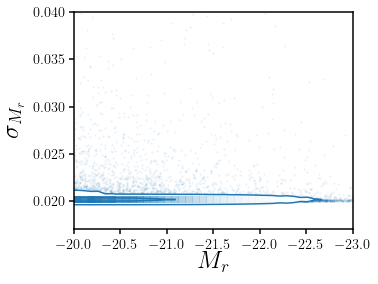

In [229]:
fig = plt.figure(figsize=(5,4))
sub = fig.add_subplot(111)

DFM.hist2d(M_r, ivar_M_r**-0.5, color='C0', 
    levels=[0.68, 0.95], range=[[-20, -23], [0.017, 0.04]], bins=40, 
    plot_datapoints=True, fill_contours=False, plot_density=True, 
    ax=sub)

sub.set_xlabel('$M_r$', fontsize=25)
sub.set_ylabel('$\sigma_{M_r}$', fontsize=25)


In [235]:
x_mr = np.linspace(0.018, 0.03, 1000)

/Users/ChangHoon/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in power
  """Entry point for launching an IPython kernel.


(0.019, 0.024)

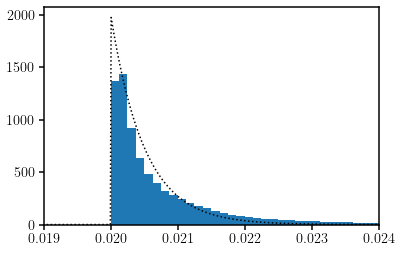

In [246]:
plt.hist(ivar_M_r**-0.5, range=[0.015, 0.04], bins=200, density=True)
plt.plot(x_mr, chi2.pdf(x_mr, 2, loc=0.02, scale=0.00025), c='k', ls=':')
plt.xlim(0.019, 0.024)

/Users/ChangHoon/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/ChangHoon/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


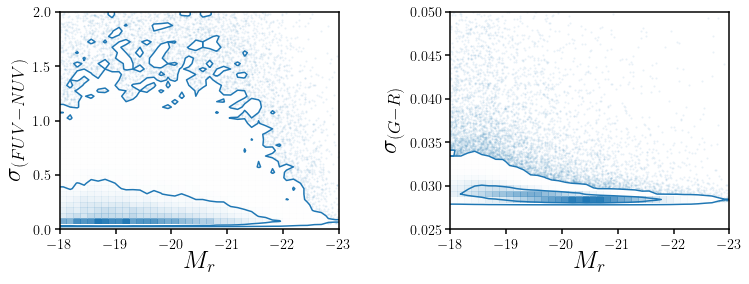

In [152]:
fig = plt.figure(figsize=(12,4))
sub = fig.add_subplot(121)

DFM.hist2d(M_r, np.sqrt(1./ivar_M_fuv + 1./ivar_M_nuv), color='C0', 
    levels=[0.68, 0.95], range=[[-18, -23], [0., 2.]], bins=40, 
    plot_datapoints=True, fill_contours=False, plot_density=True, 
    ax=sub)

sub.set_xlabel('$M_r$', fontsize=25)
sub.set_ylabel('$\sigma_{(FUV-NUV)}$', fontsize=25)

sub = fig.add_subplot(122)
DFM.hist2d(M_r, np.sqrt(1./ivar_M_g + 1./ivar_M_r), color='C0', 
    levels=[0.68, 0.95], range=[[-18, -23], [0.025, 0.05]], bins=40, 
    plot_datapoints=True, fill_contours=False, plot_density=True, 
    ax=sub)
sub.set_xlabel('$M_r$', fontsize=25)
sub.set_ylabel('$\sigma_{(G - R)}$', fontsize=25)

fig.subplots_adjust(wspace=0.4)

/Users/ChangHoon/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/ChangHoon/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/Users/ChangHoon/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/Users/ChangHoon/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/Users/ChangHoon/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can 

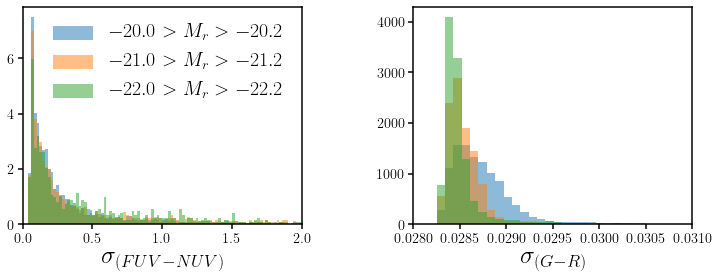

In [161]:

fig = plt.figure(figsize=(12,4))
for _mr_lim in [-20., -21., -22.]: 
    sub = fig.add_subplot(121)
    Mr_lim = ((M_r < _mr_lim) & (M_r > _mr_lim - 0.2))

    notnan = np.isfinite(np.sqrt(1./ivar_M_fuv + 1./ivar_M_nuv))
    sub.hist(np.sqrt(1./ivar_M_fuv + 1./ivar_M_nuv)[Mr_lim & notnan], range=(0., 2.0), 
             bins=100, density=True, alpha=0.5, label='$%.1f > M_r > %.1f$' % (_mr_lim, _mr_lim-0.2))
    sub.set_xlabel('$\sigma_{(FUV-NUV)}$', fontsize=25)
    sub.set_xlim(0., 2.)
    sub.legend(loc='upper right', fontsize=20)
    
    notnan = np.isfinite(np.sqrt(1./ivar_M_g + 1./ivar_M_r))
    sub = fig.add_subplot(122)
    sub.hist(np.sqrt(1./ivar_M_g + 1./ivar_M_r)[Mr_lim & notnan], range=(0.026, 0.035), bins=100, density=True, alpha=0.5)
    sub.set_xlabel('$\sigma_{(G - R)}$', fontsize=25)
    sub.set_xlim(0.028, 0.031)

fig.subplots_adjust(wspace=0.4)


In [191]:
x_fn = np.linspace(0., 2., 1000)
x_gr = np.linspace(0.028, 0.32, 10000)

In [163]:
from scipy.stats import lognorm

/Users/ChangHoon/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/ChangHoon/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/Users/ChangHoon/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/Users/ChangHoon/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/Users/ChangHoon/opt/anaconda3/envs/iq/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and

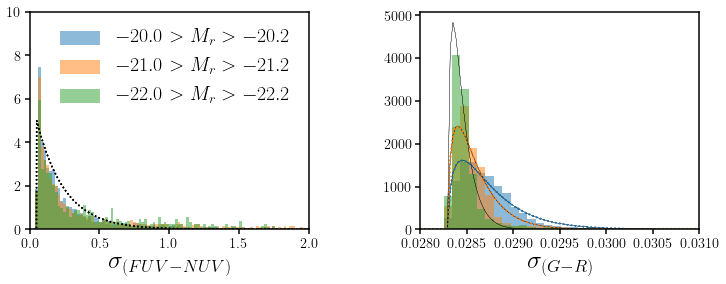

In [257]:
fig = plt.figure(figsize=(12,4))
for i, _mr_lim in enumerate([-20., -21., -22.]): 
    sub = fig.add_subplot(121)
    Mr_lim = ((M_r < _mr_lim) & (M_r > _mr_lim - 0.2))

    notnan = np.isfinite(np.sqrt(1./ivar_M_fuv + 1./ivar_M_nuv))
    sub.hist(np.sqrt(1./ivar_M_fuv + 1./ivar_M_nuv)[Mr_lim & notnan], range=(0., 2.0), 
             bins=100, density=True, alpha=0.5, color='C%i' % i, label='$%.1f > M_r > %.1f$' % (_mr_lim, _mr_lim-0.2))
    sub.plot(x_fn, chi2.pdf(x_fn, 2, loc=0.05, scale=0.1), c='k', ls=':')
    sub.set_xlabel('$\sigma_{(FUV-NUV)}$', fontsize=25)
    sub.set_xlim(0., 2.)
    sub.set_ylim(0., 10.)
    sub.legend(loc='upper right', fontsize=20)
    
    notnan = np.isfinite(np.sqrt(1./ivar_M_g + 1./ivar_M_r))
    sub = fig.add_subplot(122)
    sub.hist(np.sqrt(1./ivar_M_g + 1./ivar_M_r)[Mr_lim & notnan], range=(0.026, 0.035), bins=100, density=True, alpha=0.5)
    # M_r = -20.1
    sub.plot(x_gr, chi2.pdf(x_gr, 3, loc=0.0283, scale=0.00015), c='k', lw=0.2)
    sub.plot(x_gr, chi2.pdf(x_gr, 3, loc=0.0283, scale=0.00015), c='C0', ls=':')
    # M_r = -21.1
    sub.plot(x_gr, chi2.pdf(x_gr, 3, loc=0.0283, scale=0.0001), c='k', lw=0.2)
    sub.plot(x_gr, chi2.pdf(x_gr, 3, loc=0.0283, scale=0.0001), c='C1', ls=':')
    # M_r = -22.1
    sub.plot(x_gr, chi2.pdf(x_gr, 3, loc=0.0283, scale=0.00005), c='k', lw=0.2)
    sub.plot(x_gr, chi2.pdf((x_gr-0.0283)/0.00005, 3), c='C2', ls=':')
    sub.set_xlabel('$\sigma_{(G - R)}$', fontsize=25)
    sub.set_xlim(0.028, 0.031)
fig.subplots_adjust(wspace=0.4)
